In [153]:
import pandas as pd

# Load the datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge the two datasets on CustomerID
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')

# Check the first few rows of the merged data
merged_data


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11


In [154]:
# Check for missing values in the merged dataset
merged_data.isnull().sum()


TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
CustomerName       0
Region             0
SignupDate         0
dtype: int64

In [155]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])


In [156]:
# 1. Recency: Days since last transaction (today's date - latest transaction date)
latest_transaction_date = merged_data.groupby('CustomerID')['TransactionDate'].max()
latest_transaction_date = pd.DataFrame(latest_transaction_date)
latest_transaction_date['Recency'] = (pd.to_datetime('today') - latest_transaction_date['TransactionDate']).dt.days


In [157]:
# 2. Transaction Frequency: Count the number of transactions for each customer
transaction_frequency = merged_data.groupby('CustomerID')['TransactionID'].count().reset_index(name='TransactionFrequency')


In [158]:
# 3. Total Spend: Sum of TotalValue for each customer
total_spend = merged_data.groupby('CustomerID')['TotalValue'].sum().reset_index(name='TotalSpend')


In [159]:
# Merge the features into a single DataFrame
customer_profile = pd.merge(latest_transaction_date, transaction_frequency, on='CustomerID')
customer_profile = pd.merge(customer_profile, total_spend, on='CustomerID')


In [160]:
customer_profile.head()

,CustomerID,TransactionDate,Recency,TransactionFrequency,TotalSpend
0,C0001,2024-11-02 17:04:16,85,5,3354.52
1,C0002,2024-12-03 01:41:41,54,4,1862.74
2,C0003,2024-08-24 18:54:04,155,4,2725.38
3,C0004,2024-12-23 14:13:52,34,8,5354.88
4,C0005,2024-11-04 00:30:22,84,3,2034.24


In [161]:
customer_profile = customer_profile.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')
print(customer_profile.head())


  CustomerID     TransactionDate  Recency  TransactionFrequency  TotalSpend  \
0      C0001 2024-11-02 17:04:16       85                     5     3354.52   
1      C0002 2024-12-03 01:41:41       54                     4     1862.74   
2      C0003 2024-08-24 18:54:04      155                     4     2725.38   
3      C0004 2024-12-23 14:13:52       34                     8     5354.88   
4      C0005 2024-11-04 00:30:22       84                     3     2034.24   

          Region  
0  South America  
1           Asia  
2  South America  
3  South America  
4           Asia  


In [162]:
# Drop the duplicate columns
customer_profile = customer_profile.loc[:, ~customer_profile.columns.duplicated()]

# Check the updated columns
print(customer_profile.columns)


Index(['CustomerID', 'TransactionDate', 'Recency', 'TransactionFrequency',
       'TotalSpend', 'Region'],
      dtype='object')


#dropping duplicate columns

In [184]:
# Drop the duplicate columns
customer_profile = customer_profile.loc[:, ~customer_profile.columns.duplicated()]

# Print the updated dataset
print(customer_profile.head())


  CustomerID     TransactionDate  Recency  TransactionFrequency  TotalSpend  \
0      C0001 2024-11-02 17:04:16       85                     5     3354.52   
1      C0002 2024-12-03 01:41:41       54                     4     1862.74   
2      C0003 2024-08-24 18:54:04      155                     4     2725.38   
3      C0004 2024-12-23 14:13:52       34                     8     5354.88   
4      C0005 2024-11-04 00:30:22       84                     3     2034.24   

          Region  
0  South America  
1           Asia  
2  South America  
3  South America  
4           Asia  


In [185]:
# Perform one-hot encoding on the 'Region' column
customer_profile_encoded = pd.get_dummies(customer_profile, columns=['Region'], drop_first=False)

# Convert the boolean values to 1 and 0 (if needed)
customer_profile_encoded = customer_profile_encoded.replace({True: 1, False: 0})

# Print the updated dataset with one-hot encoding
print(customer_profile_encoded.head())


  CustomerID     TransactionDate  Recency  TransactionFrequency  TotalSpend  \
0      C0001 2024-11-02 17:04:16       85                     5     3354.52   
1      C0002 2024-12-03 01:41:41       54                     4     1862.74   
2      C0003 2024-08-24 18:54:04      155                     4     2725.38   
3      C0004 2024-12-23 14:13:52       34                     8     5354.88   
4      C0005 2024-11-04 00:30:22       84                     3     2034.24   

   Region_Asia  Region_Europe  Region_North America  Region_South America  
0            0              0                     0                     1  
1            1              0                     0                     0  
2            0              0                     0                     1  
3            0              0                     0                     1  
4            1              0                     0                     0  


/var/folders/14/wryybrhn7vs_rn8bd161jqjh0000gn/T/ipykernel_43598/3097210303.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer_profile_encoded = customer_profile_encoded.replace({True: 1, False: 0})


In [165]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_columns = ['Recency', 'TransactionFrequency', 'TotalSpend', 
                     'Region_Europe', 'Region_North America', 
                     'Region_South America', 'Region_Asia']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numerical columns
customer_profile_encoded[numerical_columns] = scaler.fit_transform(customer_profile_encoded[numerical_columns])

# Print the updated dataset with scaled features
print(customer_profile_encoded.head())


  CustomerID     TransactionDate   Recency  TransactionFrequency  TotalSpend  \
0      C0001 2024-11-02 17:04:16 -0.261491             -0.011458   -0.061701   
1      C0002 2024-12-03 01:41:41 -0.699724             -0.467494   -0.877744   
2      C0003 2024-08-24 18:54:04  0.728068             -0.467494   -0.405857   
3      C0004 2024-12-23 14:13:52 -0.982455              1.356650    1.032547   
4      C0005 2024-11-04 00:30:22 -0.275627             -0.923530   -0.783929   

   Region_Asia  Region_Europe  Region_North America  Region_South America  
0    -0.532795      -0.579284             -0.548319              1.540416  
1     1.876893      -0.579284             -0.548319             -0.649175  
2    -0.532795      -0.579284             -0.548319              1.540416  
3    -0.532795      -0.579284             -0.548319              1.540416  
4     1.876893      -0.579284             -0.548319             -0.649175  


In [166]:
# Drop non-numeric columns
data_for_clustering = customer_profile_encoded.drop(columns=['CustomerID', 'TransactionDate'])

In [167]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=3)  # Start with 2 components for visualization
pca_result = pca.fit_transform(data_for_clustering)

# Check explained variance
print("Explained variance:", pca.explained_variance_ratio_)

Explained variance: [0.30030569 0.19532872 0.18962066]


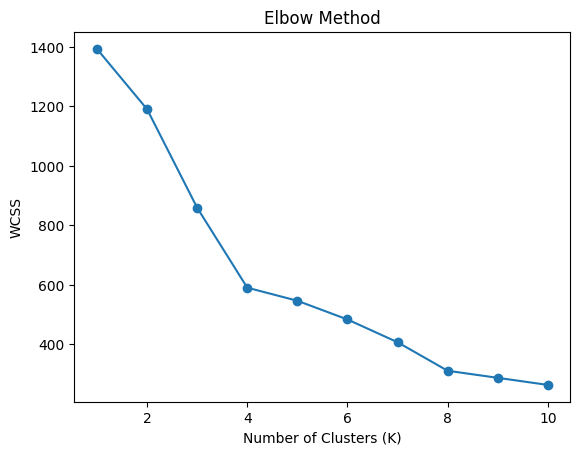

In [168]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate Within-Cluster Sum of Squares (WCSS)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)  # Use scaled data
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [169]:
# Example: Assume K=4 is optimal
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_for_clustering)

# Add clusters back to the DataFrame
customer_profile_encoded['Cluster'] = clusters

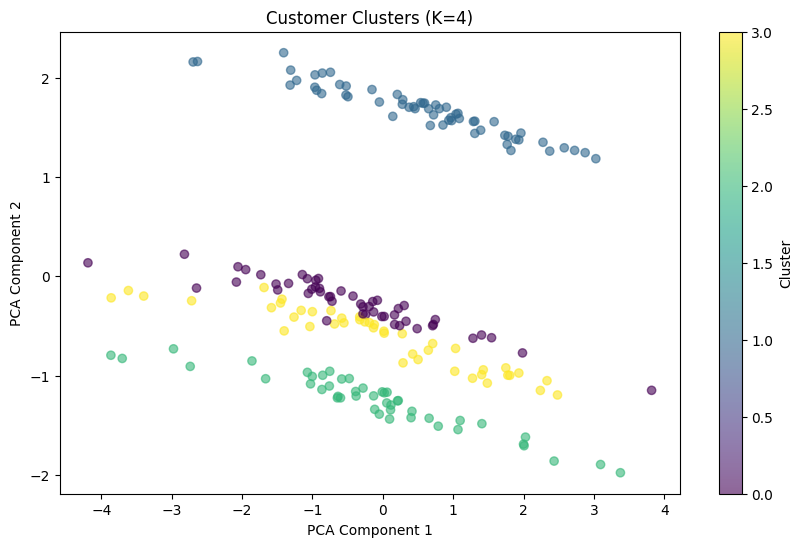

In [170]:
# Add PCA components to the DataFrame
customer_profile_encoded['PCA1'] = pca_result[:, 0]
customer_profile_encoded['PCA2'] = pca_result[:, 1]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(customer_profile_encoded['PCA1'], customer_profile_encoded['PCA2'], 
            c=customer_profile_encoded['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Clusters (K=4)')
plt.colorbar(label='Cluster')
plt.show()

In [174]:
# Drop non-numeric columns (e.g., CustomerID, TransactionDate)
numeric_data = customer_profile_encoded.drop(columns=['CustomerID', 'TransactionDate'])

# Group by 'Cluster' and calculate the mean of numeric columns
cluster_summary = numeric_data.groupby('Cluster').mean()

# Print the cluster summary
print(cluster_summary)

          Recency  TransactionFrequency  TotalSpend  Region_Asia  \
Cluster                                                            
0        0.020958             -0.157390   -0.077799    -0.532795   
1       -0.152711              0.058107    0.137044    -0.532795   
2        0.152464              0.127335   -0.085420    -0.532795   
3        0.021562             -0.032187   -0.006053     1.876893   

         Region_Europe  Region_North America  Region_South America      PCA1  \
Cluster                                                                        
0             1.726268             -0.548319             -0.649175 -0.445584   
1            -0.579284             -0.548319              1.540416  0.553790   
2            -0.579284              1.823756             -0.649175 -0.124846   
3            -0.579284             -0.548319             -0.649175 -0.105716   

             PCA2  
Cluster            
0       -0.272344  
1        1.669184  
2       -1.257558  
3       -0

In [177]:
# Drop non-numeric columns before grouping
numeric_columns = customer_profile_encoded.select_dtypes(include=['number']).columns
cluster_summary = customer_profile_encoded[numeric_columns].groupby('Cluster').mean()

print(cluster_summary)

          Recency  TransactionFrequency  TotalSpend  Region_Asia  \
Cluster                                                            
0        0.020958             -0.157390   -0.077799    -0.532795   
1       -0.152711              0.058107    0.137044    -0.532795   
2        0.152464              0.127335   -0.085420    -0.532795   
3        0.021562             -0.032187   -0.006053     1.876893   

         Region_Europe  Region_North America  Region_South America      PCA1  \
Cluster                                                                        
0             1.726268             -0.548319             -0.649175 -0.445584   
1            -0.579284             -0.548319              1.540416  0.553790   
2            -0.579284              1.823756             -0.649175 -0.124846   
3            -0.579284             -0.548319             -0.649175 -0.105716   

             PCA2  
Cluster            
0       -0.272344  
1        1.669184  
2       -1.257558  
3       -0

In [178]:
customer_profile_encoded = customer_profile_encoded.drop(columns=['CustomerID', 'TransactionDate'])

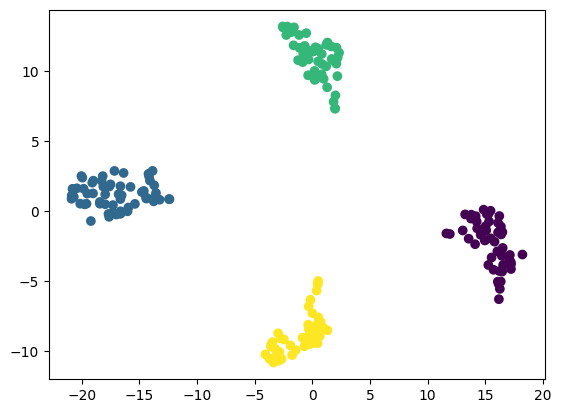

In [180]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data_for_clustering)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap='viridis')
plt.show()

In [182]:
from sklearn.metrics import davies_bouldin_score

# Calculate DB Index
db_index = davies_bouldin_score(data_for_clustering, clusters)
print(f"Davies-Bouldin Index: {db_index:.2f}")

Davies-Bouldin Index: 0.95
